# 3/30/21 - This notebook collects necessary info on 42 samples for the HST proposal due 4/9/21 with Benne.
### ID, RA, DEC, mag-r

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt

from pyprojroot import here

autoz_path = str(here())
file_path = f'{autoz_path}/files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'

In [5]:
# load sample csv
samples = pd.read_csv(f'{csv_path}latest/all_samples_latest.csv')
print(samples.columns)

Index(['Unnamed: 0', 'DEC', 'GAMA_ID', 'ID', 'KIDS_ID', 'P1', 'P3', 'R', 'RA',
       'Unnamed: 0_x', 'Unnamed: 0_y', 'cnn_probability',
       'corrected_stellar_mass', 'dlens', 'dsource', 'error',
       'lambdar_log_mstar', 'lambdar_log_mstar_error', 'lambdar_mstar', 'mag',
       'mag_err', 'name', 'normalized_score', 'num_0', 'prob', 'probability',
       'rms', 's*p/10', 'score', 'sigma1', 'sigma2', 'sigma3', 'sigma4',
       'sigma_lens', 'sigma_source', 'template1', 'template2', 'type',
       'type_number', 'z', 'z1', 'z2', 'z_max', 'z_min', 'zlens', 'zphot',
       'zsource'],
      dtype='object')


In [6]:
# load sersic cat sdss?
hdu = fits.open(f'{fits_path}SersicCatSDSS.fits')[1].data
#print(hdu.columns)
hdu_byte_swap=hdu.byteswap().newbyteorder()
sersic = pd.DataFrame(hdu_byte_swap[:]).rename(columns={'CATAID':'GAMA_ID'})[['GAMA_ID', 'R_PETRO']]
print(sersic)


        GAMA_ID    R_PETRO
0          6802  18.622816
1          6803  19.219088
2          6804  19.341200
3          6805  19.301096
4          6806  18.544878
...         ...        ...
221368  4345061  20.909586
221369  4345978  20.622234
221370  4347483  20.504171
221371  4348349  18.312876
221372  4349040  19.821329

[221373 rows x 2 columns]


In [7]:
# Take R_PETRO as the r-band Petrosian magnitude. (http://skyserver.sdss.org/dr7/en/help/docs/algorithm.asp?key=mag_petro)
samples_details = pd.merge(samples, sersic, how='left', on='GAMA_ID')[ ['GAMA_ID', 'RA', 'DEC', 'R_PETRO']]
samples_details.GAMA_ID = samples_details.GAMA_ID.astype(int)
print(samples_details)

    GAMA_ID          RA       DEC    R_PETRO
0    600305  134.759160  0.238140  17.871542
1    419067  138.619740  2.634770  17.614162
2    387244  135.569170  2.364950  17.905178
3   3611088  135.380050 -1.298310  18.307632
4    373093  139.306370  1.197760  18.967205
5    585328  182.368380 -0.008890  17.752956
6    561058  182.560300 -0.495400  18.850861
7     84425  177.774780  0.427910  18.513157
8    165293  180.601500 -2.746420  18.478994
9    559216  176.116240 -0.619020  18.452131
10   272448  179.419530  1.423090  18.668146
11   544226  214.423360 -0.892470  18.343842
12    62734  213.562060 -0.241680  18.316183
13   513159  221.916810 -0.999420  19.047604
14   593219  215.792220 -0.094550  19.079947
15   617569  212.160780  0.240100  18.633877
16   342310  215.081010  2.171340  18.978340
17   250289  214.367080  1.993110  18.974998
18   323152  130.546430  1.643250  18.576210
19  3575500  129.232650 -1.575120  18.352379
20   345595  130.022080  1.905410  18.298109
21   14520

In [8]:
# save csv
samples_details.to_csv(f'{csv_path}kids_lenses_details_hst_proposal_033021.csv')

Text(0, 0.5, 'Count')

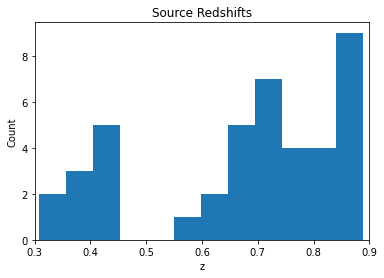

In [14]:
plt.hist(samples.zsource, bins=12)
plt.title('Source Redshifts')
plt.xlabel('z')
plt.xlim(0.3, 0.9)
plt.ylabel('Count')

In [13]:
0.4*1.4

0.5599999999999999

In [4]:
# H-alpha lines
import numpy as np
z=np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
6562*(1+z)

array([ 8530.6,  9186.8,  9843. , 10499.2, 11155.4, 11811.6, 12467.8])